## Mukul Jangid 22BCON1522
## Title: Website A/B Testing for Conversion Optimization
### Problem:

An E-Cmmerce startup wants to know if a new checkout funnerl (B) outperforms the old one (A)
### Steps:
1. Simulate click-through data (visit vs purchases) for A and B.
2. Calculate conversion rates and 95% confidence intervals.
3. Plot conversion rates with error bars.
4. Perform a two-proportion x-test to see if B beats A.
5. Real-Time Monnitoring & Sequential Testing.


### Step 1. Simulate Data for A/B Test
- Importing the necessary libraries
- Sets the random seed, so every time you run the code, you get the same results.
- This makes you results reproducible.

You are running an A/B Test
- Variant A: The orignal checkout page.
- Variant B: The new version you're testing.

You are assuming:
- Each version had 10,000 visitors.
- Version A has a true conversion rate of 10%.
- Version B has true conversion rate of 12%.

In marketing terms:
- Out of 10,000 visitors, we expect A to convert~1,000 users and B to convert~1,200.

- This simulates how many actual purchases happen out of 10,000 visitors.
- Since not every visit leads to a purchase, we model this using a binomial distribution just like flipping coin.

Each visitor has a chance to convert based on probability.

The result:
- Success_A might be something like 980/10,000
- Success_B might be something like 1215/10,000

Thses numbers are not fixed they simulate what might happen in real life when some customers buy and other don't.

Summary:
- We are pretending two versions of a website werer shown to 10,000 people each.
- One version has 10% chance of converting visitors and the ohter has 12%.
- We then simulate how many people actually purchased in each group just like it would happen on real website.

In [35]:
# 1. Simulate Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

np.random.seed(42)

# Assume 10,000 users in each group
number_a = 10_000
percent_a = 0.10  # 10% conversion rate for group A
number_b = 10_000
percent_b = 0.12  # 12% conversion rate for group B

# Simulate purchase data
purchase_a = np.random.binomial(number_a, percent_a)
purchase_b = np.random.binomial(number_b, percent_b)

### Step 2. Calculate Conversion Rates & 95% Confidence Intervals
Goal of this step:
1. Calculate the conversion rate.
2. Create a 95% confidence interval (CI) to show the uncertainty in our estimate.

What is a Conversion Rate (CR)?

- The percentage of visitors who converted.  CR = conversion/visitors

What is confidence interval?

- A range that we are 95% confident contains the true conversion rate.

If the interval is narrow we are more certain. If it's wide there's uncertainty.

Code:
- Input: number of successes(purchases), number of trails(visitors), and confidence level (default=95%).
- Output:
    - Estimated conversion rate.
    - Lower and upper bounds of the confidence interval
- Inside the function:
    - p_hat = conversion rate
    - se = standard error = how much the conversion rate could vary
    - z = z-score for 95% confidence = 1.96
    - Then we return: p'+- z*SE
- Calculate:
    - Conversion rate for A and B
    - 95% confidence intervals for both
- Then convert results into a table with:
    - Visitors, conversions, conversion rate
    - Confidence intervals (how sure we are about those rates)

In [36]:
# 2. Calculate Conversion Rates
def proportion_ci(successes,n,alpha=0.05):
    p_hat = successes / n
    z = stats.norm.ppf(1 - alpha / 2)
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    return p_hat, p_hat - z * se, p_hat + z * se
percent_a_hat, ci_a_lower, ci_a_upper = proportion_ci(purchase_a, number_a)
percent_b_hat, ci_b_lower, ci_b_upper = proportion_ci(purchase_b, number_b)

results = pd.DataFrame({
    "Variant": ["A", "B"],
    "Visitors": [number_a, number_b],
    "Conversions": [purchase_a, purchase_b],
    "Conversion Rate": [percent_a_hat, percent_b_hat],
    "CI Lower (95%)": [ci_a_lower, ci_b_lower],
    "CI Upper (95%)": [ci_a_upper, ci_b_upper]
})
pd.set_option('display.max_columns', None)
print(results)

  Variant  Visitors  Conversions  Conversion Rate  CI Lower (95%)  \
0       A     10000          973           0.0973        0.091491   
1       B     10000         1134           0.1134        0.107185   

   CI Upper (95%)  
0        0.103109  
1        0.119615  


Analyze the output:
- For variant A, about 9.73% of people bought something.
- For variant B, about 11.34% did.
- We re 95% sure that the true conversion rate lies within the listed range for each version

### Step 3. Plot conversion rates with error bars
Create a bar chart that:
- Show the conversion rate for both variants A and B.
- Adds error bars to represent uncertainity.

Code:
- set the size of plot
- This draws a bar for each variant, and put a vertical error bar on top to show uncertanity
- The error bar spans from the lower CI to upper CI, making it easy to see how accurate our estimate is.
- Label x-axis and y-axis
- Add title of the plot
- Sets the height of the chart so bars and error don;t get cut off.
- Display the chart.

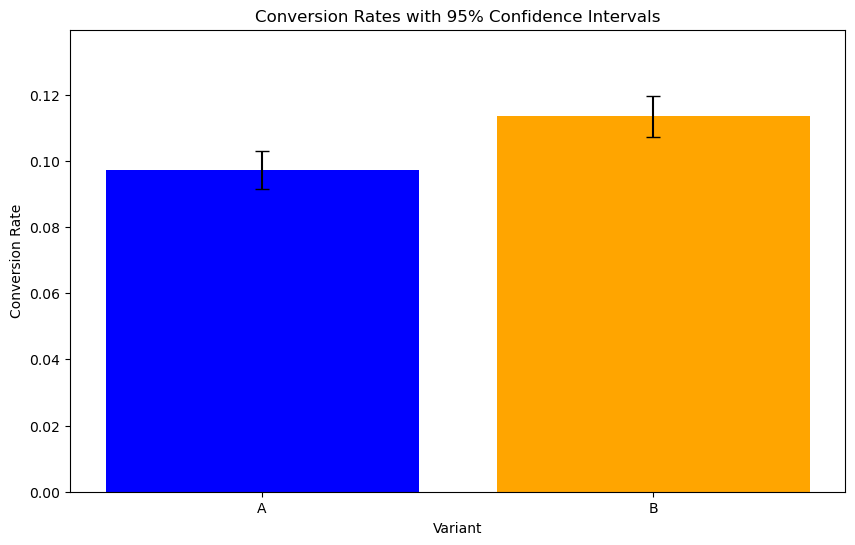

In [37]:
# 3. Plot Conversion Rates with Error Bars
plt.figure(figsize=(10, 6))
plt.bar(results['Variant'],
        results['Conversion Rate'], 
        yerr=[results['Conversion Rate'] - results['CI Lower (95%)'], 
        results['CI Upper (95%)'] - results['Conversion Rate']], 
        capsize=5, color=['blue', 'orange'])
plt.ylabel('Conversion Rate')
plt.xlabel('Variant')
plt.title('Conversion Rates with 95% Confidence Intervals')
plt.ylim(0,max(results['CI Upper (95%)']) + 0.02)
plt.show()

What the chart shows
- Two bars: One for Variant A and one for Variant B
- Height of the bar = observed conversion rate
- Thin vertical lines = 95% confidence interval
- If the error bars don't overlap, it suggest B may be significantly better than A.

Summary:

This chart shows which version of the website got more people to buy and how confident we are in that result. The bars show average results; the error lines show how much uncertainty is in our estimate.

Its a visual to understand:
- which version is performing better
- whether that difference might just be due to random chance
- This helps marketers presents data clearly and make data driven decisions with confidence

### Step 4. Two-Proportion z-test
Statistically test whether variant B performs better than variant A in terms of conversion rate.

what is z-test proportions?

It compares two groups to see if the difference between their conversion rate is:
- Real (statistically significant)
- Or just random chance

Code Explained:
- We're doung a one-sided hypothesis test:
    - H0(null): Variant B is not better than A (B<=A)
    - H1 (alternative): Variant B is better than A (B> A)
- count: the number of purchases for each variant
- nobs: the number of visitors for each variant
These are used to calculate conversion rates and standard errors.
- This runs the two-proportion z-test
- It returns:
    - z_test: the z-score (how far apart the two rates are)
    - p_value: the probability that the observed difference is due to chance
- Display the result
- If the p_value is less than 0.05 it means:
    - the difference is unlikely to be due to chance--> B is truely better.
- Otherwise:
    - We can't say for sure that B is better.

Important Points
- We are using math to ask:
    - Is B really better ar getting sales--or did it just get lucky in our sample?
- This step help marketers and decision-makers.
    - Avoid guessing or using intution alone
    - Base decisions on solid statistical evidence
 - Key learning:
    - How to formulate a hypothesis test
    - What a p-value really tells you
    - How to decide whether a difference in perfomance is statistically meningfull
It's one of the most practical statistical tools used in A/B testing and marketing analytics.

In [38]:
# 4. Two-Proportion z-test
# Test H0: percent_a <= percent_b vs H1: percent_a > percent_b
count = np.array([purchase_b,purchase_a])
nobs = np.array([number_b,number_a])
z_stat,p_value = proportions_ztest(count, nobs, alternative='larger')
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: Variant B performs significantly better than Variant A.")
else:
    print("Fail to reject H0: No significant difference between Variant A and B.")
    

Z-statistic: 3.7082
P-value: 0.0001
Reject H0: Variant B performs significantly better than Variant A.


Expanation of key steps:
1. Simulate data: We pretend each variant got 10000 visitors and has a true conversion probability then draw the actual number of conversion from a binomial distribution to mimic real world randomness.
2. Conversion rates & confidence intervals. We each variant's observed conversion rate p=conversion/visitor and a 95% CI via 
p +- z0.975 ^p(1-p)/n
3. Plot with error bars a bar chart shows each variant rate and its CI so you can visually compare whether the intervals overlap.
4. Two-Proportion z-test we test:
    - H0: Pb<=Pa vs H1: Pb> Pa
5. Real Time monitoring & Sequential testing
What: Simulate the data in small batches, update the cumulative conversion and totals, rerun the two proportion z-test each time and visualize how both the p-value and the observed lift evolve.

Why: Shows how A/B tests are monitored in production and why peeking too often can inflate false-positive rates

set up a real time simulation for how A/B test results would evolve miniute by miniute, just like in live marketing dashboard.

Libraries imported:
- numpy: Used for generating random data 
- matplotlib: used for ploting graphs
- time: used to slow down the loop
- proportion_ztest: for running ztest
- clear output: clears old output when printing updated values
Define true conversion rates for A and B:
- true_p_a = 0.10, true_p_b = 0.12
- These are the real probabilities of a visitor converting for each variant:
    - 10% for Variant A
    - 12% for variant B
Batch Simulation Settings:
- simulate 100 new visitors per variant per batch
- simulate a total of 60 time steps-like 60 min or 60 chunks of traffic
Initialize visitor and purchase counters:
- These will keep track of:
    - Total visitors shown each variant
    - Total purchase made for each
List to track metrics over time:
- You will use these lists to store:
    - Batch number
    - p-values from the ztest at each step
    - Lift (difference in conversion rate between B and A)
These lists will be used for plotting how the test evolves over times

Summary:

Set up live simulation of an A/B test. Every min new visitor arrive some buy some don't and you keep track of:
- conversion rate
- Stastistical significance
- Whether B is clearly outperfoming A
Understand how ab test are mentioned continously, not at the end which is how real marketing teams operate.

In [39]:
import numpy as np
import matplotlib.pyplot as plt,time
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output

true_p_a = 0.10  # True conversion rate for group A
true_p_b = 0.12  # True conversion rate for group B
batch_size = 100  # Number of visitors per batch
n_batch = 60

# Initialize counters
n_visits_a = n_visits_b = 0
n_purchases_a = n_purchases_b = 0

# Lists to store results
batches = []
p_values = []
lifts = []

- Loop through 60 batches (time steps)
    - for batch in range(1,n_batch+1):
run this simulation for 60 times imagine 60 min of traffic
- simulate one batch of visitors
    - This simlates 100 visitors each for version A and version B. Each one has a chance to convert(buy):
        - A: 10% chance
        - B 12% chance
- Update totals
    - keep a running total of how many:
        - visitors came in
        - Purchases were made
- Calculate conversion rate & lift
    - cr_a: total conversion rate for a so far
    - cr_b: total for b
    - Lift: how much better B is than A
- Run statistical test (ztest)
    - This test: is versino of b doung signigicantly better than a?
    - It gives you:
        - z_stats: how strong the difference is
        - p_val: the p-value 
    - if p_val <0.05 the difference is statistically significant.
- Store the results:
    - This will let you plot how you p_value and lift changes over time.
- Print results
    - How many visitors and conversion each version got
    - current conversion rates
    - the observed lift
    - the z-score and p-value
    - Whether the result is statistically yet
- Plot p-value and lift
    - Left graph: p-value over time
        - red line ar 0.05 = significant threshold
    - Right graph: observed lift over time
    you see how confidence build over time
- Add a pause:
    - this addss a 0.2 seacond pause between each batch to make the animation feel real time.

Summary:

Every round simulates a new group of visitors. We update conversion stats, run a test and plot results. Over the time we see if version B is truly better, or it's just random chance
- Important points:
    - It mimics real world A/B testing Dashboard
    - It shows how p-values change with more data
    - It teaches that peeking early can lead to wrong conclusion a common mistake in marketing experiments.

Understand both the pratical process and the statistical reasoning behind real-time decision-making.

Batch 60/60
Variant A: 6000 visits, 575 purchases -> CR = 9.583%
Variant B: 6000 visits, 716 purchases -> CR = 11.933%
Overall Lift: 2.350%
Z-stats = 4.154, P-value = 0.0000
Variant B is significantly better than A!


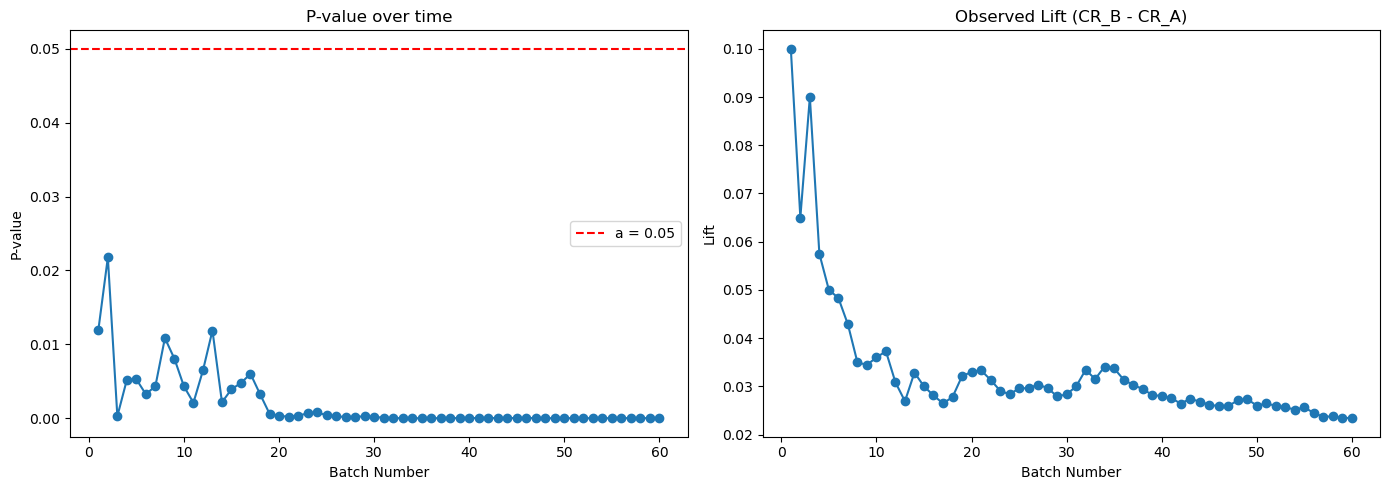

In [41]:
for batch in range(1,n_batch +1):
    # Simulate one batch of visitors
    new_a = np.random.binomial(batch_size, true_p_a)
    new_b = np.random.binomial(batch_size, true_p_b)
    
    # Update counters
    n_visits_a += batch_size
    n_visits_b += batch_size
    n_purchases_a += new_a
    n_purchases_b += new_b
    
    # Compute current conversion rates
    cr_a = n_purchases_a / n_visits_a
    cr_b = n_purchases_b / n_visits_b
    lift = cr_b - cr_a
    
    # Two proportion z-test
    count = np.array([n_purchases_b,n_purchases_a])
    nobs = np.array([n_visits_b,n_visits_a])
    z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')
    
    # Record for plotting 
    batches.append(batch)
    p_values.append(p_value)
    lifts.append(lift)
    
    # Clear last output and print new results
    clear_output(wait=True)
    print(f"Batch {batch}/{n_batch}")
    print(f"Variant A: {n_visits_a} visits, {n_purchases_a} purchases -> CR = {cr_a*100:.3f}%")
    print(f"Variant B: {n_visits_b} visits, {n_purchases_b} purchases -> CR = {cr_b*100:.3f}%") 
    print(f"Overall Lift: {lift*100:.3f}%")
    print(f"Z-stats = {z_stat:.3f}, P-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Variant B is significantly better than A!")
    else:
        print("No significant difference yet.")
    
    # Plot p-avlue and lift over time
    fig,axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].plot(batches, p_values, marker='o')
    axes[0].axhline(0.05, color='red', linestyle='--', label='a = 0.05')
    axes[0].set_title('P-value over time')
    axes[0].set_xlabel('Batch Number')
    axes[0].set_ylabel('P-value')
    axes[0].legend()
    
    axes[1].plot(batches, lifts, marker='o')
    axes[1].set_title('Observed Lift (CR_B - CR_A)')
    axes[1].set_xlabel('Batch Number')
    axes[1].set_ylabel('Lift')
    plt.tight_layout()
    plt.show()
    time.sleep(0.01)  # Pause for a second to simulate real-time updates

Key Learning
- Streaming data handling how to ipdate metrics as new visitors arrive rather than one big batch
- Sequential testing pitfals the p-value can fluctulate widly early on. peeking too often increase false positives a real industry concern.
- Monitoring dashboards the dual plot let student visualize both the p-value trajectory and the observed liftmirroring real ab dashboards.
- Practical inference learn to interpret not yet significant vs now significant in a dynamic context and appreciatethe need for pre-defined stopping rules.

Give a more historical understanding of how A/B test are deployed and monitored in production environment.
